## Daily Data

SF and MX decompositions for one year of data (1/10 degree, output1012 on /g/data/hh5 with me and output1013-15 on /g/data/e14 with Matt since one of Matt's got correupted) 

## Note: for 10th degree can't add back into arrays!!!!! 
(Since interpolation of temp levels on xhistogram ever so slightly different to MOM5 temp levels, and xarray cares/silently turns them into Nans)

#### Issues: 
- Running on analysis3-22.01, where xhistogram has a funny naming convention when temperature needs to be interpolated. But on analysis-22.04 there is some issue with xgcm.

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
client = Client(n_workers=8)
client

2022-06-14 20:30:42,179 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/e14/cy8964/analysis/usyd/Overturning_decomposition/dask-worker-space/worker-qo5xedox', purging
2022-06-14 20:30:42,190 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/e14/cy8964/analysis/usyd/Overturning_decomposition/dask-worker-space/worker-uh25f2n6', purging
2022-06-14 20:30:42,201 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/e14/cy8964/analysis/usyd/Overturning_decomposition/dask-worker-space/worker-5p2njb8a', purging
2022-06-14 20:30:42,211 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/e14/cy8964/analysis/usyd/Overturning_decomposition/dask-worker-space/worker-ij3wrsjh', purging
2022-06-14 20:30:42,221 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/e14/cy8964/analysis/usyd/Overturning_decomposition/dask-worker-space/worker-5wfexor_', purging
2022-06-14 20:3

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33817,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:38813,Total threads: 2
Dashboard: /proxy/35211/status,Memory: 31.25 GiB
Nanny: tcp://127.0.0.1:36647,


In [3]:
xch = 3600#2*288
ych = 2400#2*216


In [4]:
my_ocean_wmass = xr.open_mfdataset('/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/output1012/ocean/ocean_wmass.nc',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_yu_ocean':ych/10,'grid_xt_ocean':xch/10})
Matt_ocean_wmass = xr.open_mfdataset('/g/data/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output1012/ocean/ocean_wmass.nc',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_yu_ocean':ych/10,'grid_xt_ocean':xch/10})


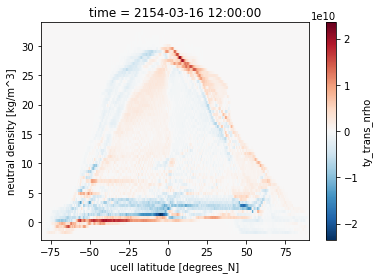

In [5]:
my_ocean_wmass.ty_trans_nrho.isel(time = 2).sum('grid_xt_ocean').plot()

Text(0.5, 1.0, 'Difference')

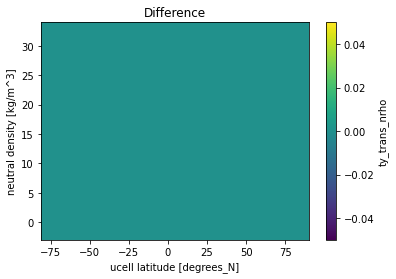

In [6]:
me_ty_trans = my_ocean_wmass.ty_trans_nrho.isel(time = 2).sum('grid_xt_ocean')
Matt_ty_trans = Matt_ocean_wmass.ty_trans_nrho.isel(time = 2).sum('grid_xt_ocean')

(me_ty_trans-Matt_ty_trans).plot()
plt.title('Difference')

Looks reproducible between Matt's run of the same time and mine.

Load everything in

In [4]:
#### load output of monthly data for 1 years (RYF) #### output 1012-1015
base_msc = '/g/data/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/'
# ---------------------------------------------------------------------------------- #
nr_outputs = 4    # define number of output files to consider
last_output = 1015  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(1,nr_outputs))
c = [] # empty list which I fill up
d = []
e = []

# add my output1012
c.append(0)
d.append(0)
e.append(0)
c[0] = '/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/output1012/ocean/ocean_wmass.nc' 
d[0] = '/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/output1012/ocean/ocean_month.nc' 
e[0] = '/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/output1012/ocean/ocean_heat.nc' 


for i in s: # loop through the number of files I would like
    c.append(i)
    d.append(i)
    e.append(i)
    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    c[i] = base_msc+'output'+str(a[i]).zfill(4) + '/ocean/ocean_wmass.nc' 
    d[i] = base_msc+'output'+str(a[i]).zfill(4) + '/ocean/ocean_month.nc' 
    e[i] = base_msc+'output'+str(a[i]).zfill(4) + '/ocean/ocean_heat.nc' 
# load in data set ----------------------------------------------------------------- #
fwmass_m = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_yu_ocean':ych/10,'grid_xt_ocean':xch/10})
fmonth_m = xr.open_mfdataset(d,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'yu_ocean':ych/10,'xt_ocean':xch/10})
fheat_m = xr.open_mfdataset(e,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})


In [5]:
print(c)

['/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/output1012/ocean/ocean_wmass.nc', '/g/data/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output1013/ocean/ocean_wmass.nc', '/g/data/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output1014/ocean/ocean_wmass.nc', '/g/data/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output1015/ocean/ocean_wmass.nc']


In [6]:
fwmass_m

,Array,Chunk
Bytes,62.57 GiB,47.46 MiB
Shape,"(12, 72, 2700, 3600)","(1, 72, 240, 360)"
Count,2908 Tasks,1440 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,62.57 GiB,47.46 MiB
Shape,"(12, 72, 2700, 3600)","(1, 72, 240, 360)"
Count,2908 Tasks,1440 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [7]:
# files:
base = '/scratch/e14/cy8964/access-om2/archive/01deg_jra55_ryf/';
xch = 3600#2*288
ych = 2400#2*216

fgrd   = xr.open_dataset(base + 'output1012/ocean/ocean_grid.nc').chunk({'yt_ocean':ych/10,'yu_ocean':ych/10,'xt_ocean':xch/10,'xu_ocean':xch/10})
## make the following in this notebook, then uncomment and rerun this cell with newly created mean nc files.
fwmass_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_wmass_mean.nc').chunk({'grid_yt_ocean':ych/10,'grid_yu_ocean':ych/10,'grid_xt_ocean':xch/10})
fmonth_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_month_mean.nc').chunk({'yt_ocean':ych/10,'yu_ocean':ych/10,'xt_ocean':xch/10})
fheat_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_heat_mean.nc').chunk({'yt_ocean':ych/10,'xt_ocean':xch/10})


# ---------------------------------------------------------------------------------- #

# Generate xgcm grid object:
gridwm = Grid(fwmass_m,coords={"x":{"center":"grid_xt_ocean"},
                             "y":{"center":"grid_yt_ocean","right":"grid_yu_ocean"},
                             "T":{"center":"neutral","outer":"neutralrho_edges"}},periodic=False)
gridmn = Grid(fmonth_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
gridht = Grid(fheat_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
# ---------------------------------------------------------------------------------- #

# Some constants:
Cp = 3992.10322329649
rho0 = 1035
dT = (fwmass_m.neutral[1]-fwmass_m.neutral[0]).values

sc_daylength = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

area = fgrd.area_t.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
dy = gridmn.diff(fgrd.yu_ocean,'y',boundary='extend').rename({'yt_ocean':'grid_yt_ocean'})

Define some functions

In [8]:
def running_av_2mos(variable):
    month_length = variable.time.dt.days_in_month
    running_mean = (variable*month_length).roll(time = 1, roll_coords = False)+ (variable*month_length)#.roll(time = -1, roll_coords = False)+2*(variable*month_length)
    time_length = (month_length).roll(time = 1, roll_coords = False)+ (month_length)#.roll(time = -1, roll_coords = False)+2*(month_length)
    running_mean = running_mean/time_length
    return running_mean


In [9]:
def running_av_2mos_mo(variable):
    month_length = variable.time.dt.days_in_month
    time_length = (month_length).roll(time = 1, roll_coords = False)+ (month_length)#.roll(time = -1, roll_coords = False)+2*(month_length)
    time_length = time_length/2
    return time_length

In [10]:
def weighted_time_mean_2mo_filter(variable):
    month_length = running_av_2mos_mo(variable.time.dt.days_in_month)
    time_mean = (variable*month_length).sum('time')/(month_length.sum('time'))
    return time_mean

In [11]:
def weighted_time_mean(variable):
    month_length = variable.time.dt.days_in_month
    time_mean = (variable*month_length).sum('time')/(month_length.sum('time'))
    return time_mean

In [12]:
fheat_m.average_DT.values/3600/24/1e9

array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
      dtype='timedelta64[ns]')

#### COMPUTATION OF TIME MEANS

Here I calculate time means using my weighted time mean function, and save them out.

In [42]:
# %%time
# ## correct time means of ocean_wmass.nc

# # weighted time average
# # mean_ty_trans_nrho = weighted_time_mean(fwmass_m.ty_trans_nrho)
# # mean_ty_trans_nrho_submeso = weighted_time_mean(fwmass_m.ty_trans_nrho_submeso)
# # mean_temp_vdiffuse_sbc_on_nrho = weighted_time_mean(fwmass_m.temp_vdiffuse_sbc_on_nrho)
# # mean_sfc_hflux_pme_on_nrho = weighted_time_mean(fwmass_m.sfc_hflux_pme_on_nrho)
# # mean_frazil_on_nrho = weighted_time_mean(fwmass_m.frazil_on_nrho)
# # mean_sw_heat_on_nrho = weighted_time_mean(fwmass_m.sw_heat_on_nrho)
# # mean_temp_vdiffuse_diff_cbt_on_nrho = weighted_time_mean(fwmass_m.temp_vdiffuse_diff_cbt_on_nrho)
# # mean_temp_nonlocal_KPP_on_nrho = weighted_time_mean(fwmass_m.temp_nonlocal_KPP_on_nrho)
# # mean_temp_eta_smooth_on_nrho = weighted_time_mean(fwmass_m.temp_eta_smooth_on_nrho)
# # mean_temp_rivermix_on_nrho = weighted_time_mean(fwmass_m.temp_rivermix_on_nrho)
# # mean_sw_heat_on_nrho = weighted_time_mean(fwmass_m.sw_heat_on_nrho)

# # # load
# # mean_ty_trans_nrho.load()
# # mean_temp_vdiffuse_sbc_on_nrho.load()
# # mean_sfc_hflux_pme_on_nrho.load()
# # mean_frazil_on_nrho.load()
# # mean_sw_heat_on_nrho.load()
# # mean_temp_vdiffuse_diff_cbt_on_nrho.load()
# # mean_temp_nonlocal_KPP_on_nrho.load()
# # mean_sw_heat_on_nrho.load()
# mean_temp_eta_smooth_on_nrho.load()
# mean_temp_rivermix_on_nrho.load()
# mean_ty_trans_nrho_submeso.load()

CPU times: user 2min 28s, sys: 23.8 s, total: 2min 52s
Wall time: 4min 5s


<xarray.DataArray (neutral: 72, grid_yu_ocean: 2700, grid_xt_ocean: 3600)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * neutral        (neutral) float64 -2.743 -2.229 -1.715 ... 32.72 33.23 33.74

In [53]:
# # save to ncfile
# ds = xr.Dataset({'ty_trans_nrho': mean_ty_trans_nrho, 'temp_vdiffuse_sbc_on_nrho': mean_temp_vdiffuse_sbc_on_nrho, 
#                  'sfc_hflux_pme_on_nrho':mean_sfc_hflux_pme_on_nrho, 'frazil_on_nrho':mean_frazil_on_nrho,
#                  'sw_heat_on_nrho':mean_sw_heat_on_nrho,'temp_vdiffuse_diff_cbt_on_nrho':mean_temp_vdiffuse_diff_cbt_on_nrho,
#                  'temp_nonlocal_KPP_on_nrho':mean_temp_nonlocal_KPP_on_nrho,
#                  'temp_rivermix_on_nrho':mean_temp_rivermix_on_nrho,
#                  'temp_eta_smooth_on_nrho':mean_temp_eta_smooth_on_nrho,'ty_trans_nrho_submeso':mean_ty_trans_nrho_submeso})
                 
# ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_wmass_mean.nc', 
#          encoding={'ty_trans_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_sbc_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sfc_hflux_pme_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'frazil_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_nonlocal_KPP_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'frazil_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sw_heat_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_eta_smooth_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_rivermix_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'ty_trans_nrho_submeso': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [62]:
# %%time
# # ## correct time means of ocean_heat.nc

# # # weighted time average
# # mean_temp_vdiffuse_sbc = weighted_time_mean(fheat_m.temp_vdiffuse_sbc)
# # mean_sfc_hflux_pme = weighted_time_mean(fheat_m.sfc_hflux_pme)
# # mean_frazil_3d = weighted_time_mean(fheat_m.frazil_3d)
# # mean_sw_heat = weighted_time_mean(fheat_m.sw_heat)
# # mean_temp_vdiffuse_diff_cbt = weighted_time_mean(fheat_m.temp_vdiffuse_diff_cbt)
# # mean_temp_nonlocal_KPP = weighted_time_mean(fheat_m.temp_nonlocal_KPP)
# # mean_sw_heat = weighted_time_mean(fheat_m.sw_heat)
# # mean_temp_rivermix = weighted_time_mean(fheat_m.temp_rivermix)
# # mean_temp_eta_smooth = weighted_time_mean(fheat_m.temp_eta_smooth)

# # # load
# # mean_temp_vdiffuse_sbc.load()
# # mean_sfc_hflux_pme.load()
# # mean_frazil_3d.load()
# # mean_sw_heat.load()
# # mean_temp_vdiffuse_diff_cbt.load()
# # mean_temp_nonlocal_KPP.load()
# mean_temp_rivermix.load()
# mean_temp_eta_smooth.load()

# # save to ncfile
# ds = xr.Dataset({'temp_vdiffuse_sbc': mean_temp_vdiffuse_sbc, 
#                  'sfc_hflux_pme':mean_sfc_hflux_pme, 'frazil_3d':mean_frazil_3d,
#                  'sw_heat':mean_sw_heat,'temp_vdiffuse_diff_cbt':mean_temp_vdiffuse_diff_cbt,
#                  'temp_nonlocal_KPP':mean_temp_nonlocal_KPP,'temp_rivermix':mean_temp_rivermix,
#                  'temp_eta_smooth':mean_temp_eta_smooth})
                 
# ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_heat_mean.nc', 
#          encoding={'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sfc_hflux_pme': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_nonlocal_KPP': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_rivermix': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_eta_smooth': {'shuffle': True, 'zlib': True, 'complevel': 5}})



2022-06-14 11:31:08,213 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:41483
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/comm/tcp.py", line 444, in connect
    stream = await self.client.connect(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/tornado/tcpclient.py", line 275, in connect
    af, addr, stream = await connector.start(connect_timeout=timeout)
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/asyncio/tasks.py", line 490, in wait_for
    return fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/minicond

CPU times: user 7min 8s, sys: 21 s, total: 7min 29s
Wall time: 9min 22s


In [64]:
# %%time
# ## correct time means of ocean_month.nc

# # weighted time average
# mean_temp = weighted_time_mean(fmonth_m.temp)
# mean_ty_trans = weighted_time_mean(fmonth_m.ty_trans)

# # load
# mean_temp.load()
# mean_ty_trans.load()

# # save to ncfile
# ds = xr.Dataset({'temp': mean_temp, 'ty_trans':mean_ty_trans, })
                 
# ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/ocean_month_mean.nc', 
#          encoding={'temp': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'ty_trans': {'shuffle': True, 'zlib': True, 'complevel': 5}})



2022-06-14 11:44:21,822 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 21.88 GiB -- Worker memory limit: 31.25 GiB
2022-06-14 11:44:21,899 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 21.88 GiB -- Worker memory limit: 31.25 GiB
2022-06-14 11:44:21,998 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 21.88 GiB -- Worker memory limit: 31.25 GiB
2022-06-14 11:44:22,113 - distributed

CPU times: user 5min 24s, sys: 31.4 s, total: 5min 55s
Wall time: 10min 17s


### Continue Here:

In [35]:
# Group SF and MX terms for monthly data:
fwmass_m["SF_cv"] = fwmass_m.temp_vdiffuse_sbc_on_nrho + \
                       fwmass_m.sfc_hflux_pme_on_nrho + \
                       fwmass_m.frazil_on_nrho + \
                       fwmass_m.sw_heat_on_nrho #+ \
                       #fwmass_m.temp_rivermix_on_nrho
fwmass_m["MX_cv"] = fwmass_m.temp_vdiffuse_diff_cbt_on_nrho + \
                       fwmass_m.temp_nonlocal_KPP_on_nrho 

obj, obj2 = xr.broadcast(fheat_m.sfc_hflux_pme,fheat_m.temp_vdiffuse_sbc)
sfc_hflux_pme_m = obj.where(fheat_m.st_ocean==fheat_m.st_ocean[0],other=0.)
fheat_m["sfc_hflux_pme_m"]=sfc_hflux_pme_m

fheat_m["SF_cv"] = fheat_m.temp_vdiffuse_sbc + \
                      sfc_hflux_pme_m + \
                      fheat_m.frazil_3d + \
                      fheat_m.sw_heat# + \
#                      fheat_m.temp_rivermix
fheat_m["MX_cv"] = fheat_m.temp_vdiffuse_diff_cbt + \
                      fheat_m.temp_nonlocal_KPP 
# Group mean SF and MX terms:
fwmass_mean["SF_cv"] = fwmass_mean.temp_vdiffuse_sbc_on_nrho + \
                       fwmass_mean.sfc_hflux_pme_on_nrho + \
                       fwmass_mean.frazil_on_nrho + \
                       fwmass_mean.sw_heat_on_nrho #+ \
                       #fwmass_mean.temp_rivermix_on_nrho
fwmass_mean["MX_cv"] = fwmass_mean.temp_vdiffuse_diff_cbt_on_nrho + \
                       fwmass_mean.temp_nonlocal_KPP_on_nrho 

obj, obj2 = xr.broadcast(fheat_mean.sfc_hflux_pme,fheat_mean.temp_vdiffuse_sbc)
sfc_hflux_pme_mean = obj.where(fheat_mean.st_ocean==fheat_mean.st_ocean[0],other=0.)
fheat_mean["sfc_hflux_pme_mean"]=sfc_hflux_pme_mean

fheat_mean["SF_cv"] = fheat_mean.temp_vdiffuse_sbc + \
                      sfc_hflux_pme_mean + \
                      fheat_mean.frazil_3d + \
                      fheat_mean.sw_heat  #+ \
                      #fheat_mean.temp_rivermix
fheat_mean["MX_cv"] = fheat_mean.temp_vdiffuse_diff_cbt + \
                      fheat_mean.temp_nonlocal_KPP


Calculate running 2 month means and save them in same DataSets for ease of use with xgcm.
Binning done with xhistogram to capture partial cells.

In [36]:
tbins = fwmass_m.neutralrho_edges.values

In [37]:
# calculate a running mean of 2 months of ty_trans_nrho, temp and ty_trans and add them back into datasets
fwmass_m['ty_trans_nrho_2mo'] = running_av_2mos(fwmass_m.ty_trans_nrho)
fmonth_m['temp_2mo'] = running_av_2mos(fmonth_m.temp)
fmonth_m['ty_trans_2mo'] = running_av_2mos(fmonth_m.ty_trans)

# temperature binning of time-mean (2 month running average of both temp and ty_trans):
temp_u_mean = gridmn.interp(fmonth_m.temp_2mo,'y',boundary='extend')-273.15
ty_trans_nrho_mean_2mo = histogram(temp_u_mean, bins=[tbins], dim = ['st_ocean'],weights=fmonth_m.ty_trans_2mo).rename({temp_u_mean.name+'_bin':'neutral','xt_ocean':'grid_xt_ocean','yu_ocean':'grid_yu_ocean'})

# temperature binning of 1 year
temp_u_mean_tot = gridmn.interp(fmonth_mean.temp,'y',boundary='extend')-273.15
ty_trans_nrho_mean_1yr = histogram(temp_u_mean_tot, bins=[tbins], dim = ['st_ocean'],weights=fmonth_mean.ty_trans).rename({temp_u_mean_tot.name+'_bin':'neutral','xt_ocean':'grid_xt_ocean','yu_ocean':'grid_yu_ocean'})


now do running averages of surface flux and mixing:

In [38]:
# calculate a running mean of 2 months of things
fheat_m['SF_cv_2mo'] = running_av_2mos(fheat_m.SF_cv)
fheat_m['MX_cv_2mo'] = running_av_2mos(fheat_m.MX_cv)

# fheat_m['sw_heat_2mo'] = running_av_2mos(fheat_m.sw_heat)
# fheat_m['frazil_3d_2mo'] = running_av_2mos(fheat_m.frazil_3d)
# fheat_m['temp_vdiffuse_sbc_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_sbc)
# fheat_m['sfc_hflux_pme_2mo'] = running_av_2mos(fheat_m.sfc_hflux_pme_m)
# fheat_m['temp_nonlocal_KPP_2mo'] = running_av_2mos(fheat_m.temp_nonlocal_KPP)
# fheat_m['temp_vdiffuse_diff_cbt_kppish_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppish)
# fheat_m['temp_vdiffuse_diff_cbt_kppicon_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppicon)
# fheat_m['temp_vdiffuse_diff_cbt_kppbl_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppbl)
# fheat_m['temp_vdiffuse_diff_cbt_kppdd_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppdd)
# fheat_m['temp_vdiffuse_diff_cbt_wave_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_wave)

# ##10 day means

# fheat_daily['SF_cv_10day'] = running_av_10days(fheat_daily.SF_cv)
# fheat_daily['MX_cv_10day'] = running_av_10days(fheat_daily.MX_cv)

# fheat_daily['sw_heat_10day'] = running_av_10days(fheat_daily.sw_heat)
# fheat_daily['frazil_3d_10day'] = running_av_10days(fheat_daily.frazil_3d)
# fheat_daily['temp_vdiffuse_sbc_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_sbc)
# fheat_daily['sfc_hflux_pme_10day'] = running_av_10days(fheat_daily.sfc_hflux_pme_daily)
# fheat_daily['temp_nonlocal_KPP_10day'] = running_av_10days(fheat_daily.temp_nonlocal_KPP)
# fheat_daily['temp_vdiffuse_diff_cbt_kppish_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_diff_cbt_kppish)
# fheat_daily['temp_vdiffuse_diff_cbt_kppicon_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_diff_cbt_kppicon)
# fheat_daily['temp_vdiffuse_diff_cbt_kppbl_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_diff_cbt_kppbl)
# fheat_daily['temp_vdiffuse_diff_cbt_kppdd_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_diff_cbt_kppdd)
# fheat_daily['temp_vdiffuse_diff_cbt_wave_10day'] = running_av_10days(fheat_daily.temp_vdiffuse_diff_cbt_wave)



Bin daily and 10daily

In [39]:
# # temperature binning of daily and 10 daily data
# # SF and MX:
# fwmass_daily["SF_cv_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.SF_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["MX_cv_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.MX_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["SF_cv_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.SF_cv_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["MX_cv_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.MX_cv_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# # SF decomposition
# fwmass_daily["sw_heat_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.sw_heat).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["sw_heat_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.sw_heat_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["frazil_3d_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.frazil_3d).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["frazil_3d_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.frazil_3d_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["temp_vdiffuse_sbc_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_sbc).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_sbc_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_sbc_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["sfc_hflux_pme_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.sfc_hflux_pme_daily).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["sfc_hflux_pme_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.sfc_hflux_pme_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# # MX decomposition

# fwmass_daily["temp_nonlocal_KPP_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_nonlocal_KPP).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_nonlocal_KPP_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_nonlocal_KPP_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})


# fwmass_daily["temp_vdiffuse_diff_cbt_kppish_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppish).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_diff_cbt_kppish_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppish_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["temp_vdiffuse_diff_cbt_kppicon_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppicon).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_diff_cbt_kppicon_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppicon_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["temp_vdiffuse_diff_cbt_kppbl_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppbl).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_diff_cbt_kppbl_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppbl_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["temp_vdiffuse_diff_cbt_kppdd_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppdd).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_diff_cbt_kppdd_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_kppdd_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_daily["temp_vdiffuse_diff_cbt_wave_mean_1day"] = histogram(fdaily.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_wave).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_daily["temp_vdiffuse_diff_cbt_wave_mean_10day"] = histogram(fdaily.temp_10day-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_daily.temp_vdiffuse_diff_cbt_wave_10day).rename({'temp_10day_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})


Bin two month binned things into temperature space

In [40]:
# temperature binning of 2 month mean
# SF and MX:
#temp_u_mean = gridmn.interp(fmonth_m.temp_2mo,'y',boundary='extend')-273.15
SF_cv_mean_2mo = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.SF_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
MX_cv_mean_2mo = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.MX_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["sw_heat_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.sw_heat_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["frazil_3d_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.frazil_3d_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_vdiffuse_sbc_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_sbc_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["sfc_hflux_pme_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.sfc_hflux_pme_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_nonlocal_KPP_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_nonlocal_KPP_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

# fwmass_m["temp_vdiffuse_diff_cbt_kppish_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppish_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_vdiffuse_diff_cbt_kppicon_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppicon_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_vdiffuse_diff_cbt_kppbl_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppbl_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_vdiffuse_diff_cbt_kppdd_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppdd_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_m["temp_vdiffuse_diff_cbt_wave_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_wave_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})



Bin 1 year mean stuff

In [41]:
# SF and MX: (use xhistogram because seems to have issues with xgcm)
tbins = fwmass_m.neutralrho_edges.values
# apply histogram binning to st_ocean dimension
SF_cv_mean_tot = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.SF_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
MX_cv_mean_tot = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.MX_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["sw_heat_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.sw_heat).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["frazil_3d_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.frazil_3d).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_sbc_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_sbc).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["sfc_hflux_pme_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.sfc_hflux_pme_mean).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_nonlocal_KPP_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_nonlocal_KPP).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_diff_cbt_kppish_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppish).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_diff_cbt_kppicon_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppicon).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_diff_cbt_kppbl_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppbl).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_diff_cbt_kppdd_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppdd).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
# fwmass_mean["temp_vdiffuse_diff_cbt_wave_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_wave).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

Calculate surface forcing, vertical mixing and streamfunction terms

**WITHOUT .sum('grid_xt_ocean')..../dy**

In [42]:
# True surface forcing and vertical mixing:
SF = -gridwm.cumsum((fwmass_mean.SF_cv*area), 'T',boundary="fill",fill_value=0)
MX = -gridwm.cumsum((fwmass_mean.MX_cv*area), 'T',boundary="fill",fill_value=0)

# sw_heat = -gridwm.cumsum((fwmass_mean.sw_heat_on_nrho*area), 'T',boundary="fill",fill_value=0)
# frazil_3d = -gridwm.cumsum((fwmass_mean.frazil_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_sbc = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_sbc_on_nrho*area), 'T',boundary="fill",fill_value=0)
# sfc_hflux_pme = -gridwm.cumsum((fwmass_mean.sfc_hflux_pme_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_nonlocal_KPP = -gridwm.cumsum((fwmass_mean.temp_nonlocal_KPP_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppish = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppish_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppicon = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppicon_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppbl = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppbl_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppdd = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppdd_on_nrho*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_wave = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_wave_on_nrho*area), 'T',boundary="fill",fill_value=0)

# Same for 2 mo time mean:
SF_mean_2mo = -gridwm.cumsum((SF_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)
MX_mean_2mo = -gridwm.cumsum((MX_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)

# sw_heat_mean_2mo = -gridwm.cumsum((fwmass_m.sw_heat_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# frazil_3d_mean_2mo = -gridwm.cumsum((fwmass_m.frazil_3d_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_sbc_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_sbc_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# sfc_hflux_pme_mean_2mo  = -gridwm.cumsum((fwmass_m.sfc_hflux_pme_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_nonlocal_KPP_mean_2mo  = -gridwm.cumsum((fwmass_m.temp_nonlocal_KPP_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppish_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppish_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppicon_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppicon_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppbl_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppbl_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppdd_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppdd_mean_2mo*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_wave_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_wave_mean_2mo*area), 'T',boundary="fill",fill_value=0)

# # # same for 1 day mean:
# SF_1day = -gridwm.cumsum((fwmass_daily.SF_cv_mean_1day*area), 'T',boundary="fill",fill_value=0)
# MX_1day = -gridwm.cumsum((fwmass_daily.MX_cv_mean_1day*area), 'T',boundary="fill",fill_value=0)

# sw_heat_1day = -gridwm.cumsum((fwmass_daily.sw_heat_mean_1day*area), 'T',boundary="fill",fill_value=0)
# frazil_3d_mean_1day = -gridwm.cumsum((fwmass_daily.frazil_3d_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_sbc_mean_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_sbc_mean_1day*area), 'T',boundary="fill",fill_value=0)
# sfc_hflux_pme_mean_1day  = -gridwm.cumsum((fwmass_daily.sfc_hflux_pme_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_nonlocal_KPP_mean_1day  = -gridwm.cumsum((fwmass_daily.temp_nonlocal_KPP_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppish_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppish_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppicon_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppicon_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppbl_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppbl_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppdd_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppdd_mean_1day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_wave_1day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_wave_mean_1day*area), 'T',boundary="fill",fill_value=0)


# #same for 10 day mean:
# SF_10day = -gridwm.cumsum((fwmass_daily.SF_cv_mean_10day*area), 'T',boundary="fill",fill_value=0)
# MX_10day = -gridwm.cumsum((fwmass_daily.MX_cv_mean_10day*area), 'T',boundary="fill",fill_value=0)

# sw_heat_10day = -gridwm.cumsum((fwmass_daily.sw_heat_mean_10day*area), 'T',boundary="fill",fill_value=0)
# frazil_3d_mean_10day = -gridwm.cumsum((fwmass_daily.frazil_3d_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_sbc_mean_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_sbc_mean_10day*area), 'T',boundary="fill",fill_value=0)
# sfc_hflux_pme_mean_10day  = -gridwm.cumsum((fwmass_daily.sfc_hflux_pme_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_nonlocal_KPP_mean_10day  = -gridwm.cumsum((fwmass_daily.temp_nonlocal_KPP_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppish_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppish_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppicon_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppicon_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppbl_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppbl_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppdd_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_kppdd_mean_10day*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_wave_10day = -gridwm.cumsum((fwmass_daily.temp_vdiffuse_diff_cbt_wave_mean_10day*area), 'T',boundary="fill",fill_value=0)


# Same for total time mean
SF_mean_tot = -gridwm.cumsum((SF_cv_mean_tot*area), 'T',boundary="fill",fill_value=0)
MX_mean_tot = -gridwm.cumsum((MX_cv_mean_tot*area), 'T',boundary="fill",fill_value=0)

# sw_heat_mean_tot = -gridwm.cumsum((fwmass_mean.sw_heat_mean_tot*area), 'T',boundary="fill",fill_value=0)
# frazil_3d_mean_tot = -gridwm.cumsum((fwmass_mean.frazil_3d_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_sbc_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_sbc_mean_tot*area), 'T',boundary="fill",fill_value=0)
# sfc_hflux_pme_mean_tot  = -gridwm.cumsum((fwmass_mean.sfc_hflux_pme_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_nonlocal_KPP_mean_tot  = -gridwm.cumsum((fwmass_mean.temp_nonlocal_KPP_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppish_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppish_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppicon_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppicon_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppbl_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppbl_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_kppdd_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppdd_mean_tot*area), 'T',boundary="fill",fill_value=0)
# temp_vdiffuse_diff_cbt_wave_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_wave_mean_tot*area), 'T',boundary="fill",fill_value=0)

# # # Same for seasonal climatology:
# # SF_sc = -gridwm.cumsum((fwmass_sc.SF_cv_sc*area).sum('grid_xt_ocean'), 'T',boundary="fill",fill_value=0)/dy
# # MX_sc = -gridwm.cumsum((fwmass_sc.MX_cv_sc*area).sum('grid_xt_ocean'), 'T',boundary="fill",fill_value=0)/dy

In [43]:
# Calculate stream function for 1 yr mean transport 
Psi = gridwm.cumsum(fwmass_mean.ty_trans_nrho, 'T',boundary="fill", fill_value=0)/rho0

Psi_mean_tot = gridwm.cumsum(ty_trans_nrho_mean_1yr, 'T',boundary="fill", fill_value=0)/rho0
Psi_mean_2mo = gridwm.cumsum(ty_trans_nrho_mean_2mo, 'T',boundary="fill", fill_value=0)/rho0
# Psi_mean_10day = gridwm.cumsum(fwmass_daily.ty_trans_nrho_mean_10day, 'T',boundary="fill", fill_value=0)/rho0
# Psi_mean_1day = gridwm.cumsum(fwmass_daily.ty_trans_nrho_mean_1day, 'T',boundary="fill", fill_value=0)/rho0


### Load 1 year true terms

In [44]:
Psi

<xarray.DataArray 'concatenate-8e1a08537a2786ec0b69e881eb72ff55' (
                                                                  neutralrho_edges: 73,
                                                                  grid_yu_ocean: 2700,
                                                                  grid_xt_ocean: 3600)>
dask.array<truediv, shape=(73, 2700, 3600), dtype=float64, chunksize=(72, 240, 360), chunktype=numpy.ndarray>
Coordinates:
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.486 ... 33.49 34.0
  * grid_yu_ocean     (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95

In [45]:
%%time

Psi.load()
SF.load()
MX.load()

# sw_heat.load()
# frazil_3d.load()
# temp_vdiffuse_sbc.load()
# sfc_hflux_pme.load()
# temp_nonlocal_KPP.load()
# temp_vdiffuse_diff_cbt_kppish.load()
# temp_vdiffuse_diff_cbt_kppicon.load()
# temp_vdiffuse_diff_cbt_kppbl.load()
# temp_vdiffuse_diff_cbt_kppdd.load()
# temp_vdiffuse_diff_cbt_wave.load()

CPU times: user 43.1 s, sys: 32.7 s, total: 1min 15s
Wall time: 3min 48s


<xarray.DataArray 'concatenate-dc370377f4f3fd425f27f72198035379' (
                                                                  neutralrho_edges: 73,
                                                                  grid_yt_ocean: 2700,
                                                                  grid_xt_ocean: 3600)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]])
Coordinates:
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.486 ... 33.49 34.0
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.11 -81.07 ... 89.94 89.98
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95

In [46]:
ds = xr.Dataset({'Psi': Psi, 'SF': SF, 'MX': MX})
ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/True_1year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5}})

### Load 1 year mean (mean_tot)

In [47]:
%%time

Psi_mean_tot.load()
SF_mean_tot.load()
MX_mean_tot.load()

# sw_heat_mean_tot.load()
# frazil_3d_mean_tot.load()
# temp_vdiffuse_sbc_mean_tot.load()
# sfc_hflux_pme_mean_tot.load()
# temp_nonlocal_KPP_mean_tot.load()
# temp_vdiffuse_diff_cbt_kppish_mean_tot.load()
# temp_vdiffuse_diff_cbt_kppicon_mean_tot.load()
# temp_vdiffuse_diff_cbt_kppbl_mean_tot.load()
# temp_vdiffuse_diff_cbt_kppdd_mean_tot.load()
# temp_vdiffuse_diff_cbt_wave_mean_tot.load()

2022-06-14 21:45:54,742 - distributed.worker_memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 26.46 GiB -- Worker memory limit: 31.25 GiB
2022-06-14 21:45:54,761 - distributed.worker_memory - WARNING - Worker is at 59% memory usage. Resuming worker. Process memory: 18.51 GiB -- Worker memory limit: 31.25 GiB


CPU times: user 1min 25s, sys: 35.6 s, total: 2min 1s
Wall time: 7min 13s


<xarray.DataArray 'concatenate-64e1ba99c5e6a6ce3897524e9ef03599' (
                                                                  grid_yt_ocean: 2700,
                                                                  grid_xt_ocean: 3600,
                                                                  neutralrho_edges: 73)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]])
Coordinates:
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.11 -81.07 ... 89.94 89.98
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.486 ... 33.49 34.0

In [48]:
ds = xr.Dataset({'Psi': Psi_mean_tot, 'SF': SF_mean_tot, 'MX': MX_mean_tot})
ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/Mean_1year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5}})

### Load 2 month running mean quantities

In [30]:
# Psi_mean_2mo = weighted_time_mean_2mo_filter(Psi_mean_2mo)
# SF_mean_2mo = weighted_time_mean_2mo_filter(SF_mean_2mo)
# MX_mean_2mo = weighted_time_mean_2mo_filter(MX_mean_2mo)

# sw_heat_mean_2mo = weighted_time_mean_2mo_filter(sw_heat_mean_2mo)
# frazil_3d_mean_2mo = weighted_time_mean_2mo_filter(frazil_3d_mean_2mo)
# temp_vdiffuse_sbc_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_sbc_mean_2mo)
# sfc_hflux_pme_mean_2mo= weighted_time_mean_2mo_filter(sfc_hflux_pme_mean_2mo)
# temp_nonlocal_KPP_mean_2mo= weighted_time_mean_2mo_filter(temp_nonlocal_KPP_mean_2mo)

# temp_vdiffuse_diff_cbt_kppish_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppish_mean_2mo)
# temp_vdiffuse_diff_cbt_kppicon_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppicon_mean_2mo)
# temp_vdiffuse_diff_cbt_kppbl_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppbl_mean_2mo)
# temp_vdiffuse_diff_cbt_kppdd_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppdd_mean_2mo)
# temp_vdiffuse_diff_cbt_wave_mean_2mo = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_wave_mean_2mo)

In [22]:
month_length = (sc_daylength+np.roll(sc_daylength,1))/2
month_length

array([31. , 29.5, 29.5, 30.5, 30.5, 30.5, 30.5, 31. , 30.5, 30.5, 30.5,
       30.5])

In [28]:
%%time

monthly_array = MX_mean_2mo.sum('grid_xt_ocean')/dy#Psi_mean_2mo.sum('grid_xt_ocean')#
monthly_array_name = 'MX_mean_2mo'#'SF_mean_2mo'
####### ------------------- ########
#monthly_array_timemean = xr.zeros_like(monthly_array.isel(time = 0))
nt = len(monthly_array.time)
for i in np.arange(12):
    print('Doing time step ' + str(i+1) + ' of ' + str(nt))
    monthly_array_t = monthly_array.isel(time=i);
    monthly_array_t.load()
    #monthly_array_timemean += monthly_array_t*month_length[i]
    ds = xr.Dataset({monthly_array_name: monthly_array_t})
    ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_'+monthly_array_name+'mo_'+str(i)+'.nc', 
             encoding={monthly_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})

#monthly_array_timemean = monthly_array_timemean/365
#monthly_array_timemean.load()


Doing time step 1 of 12


Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/colorama/initialise.py", line 18, in reset_all
    def reset_all():
KeyboardInterrupt
2022-06-14 21:01:08,200 - distributed.nanny - WARNING - Restarting worker
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/colorama/initialise.py", line 18, in reset_all
    def reset_all():
KeyboardInterrupt
2022-06-14 21:01:13,273 - distributed.nanny - WARNING - Restarting worker
2022-06-14 21:01:20,274 - distributed.nanny - WARNING - Worker process still alive after 3.999995613098145 seconds, killing
2022-06-14 21:01:20,275 - distributed.nanny - WARNING - Worker process still alive after 3.9999988555908206 seconds, killing
2022-06-14 21:01:20,361 - distributed.nanny - WARNING - Worker process still alive after 3.9999982833862306 secon

Doing time step 2 of 12


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Doing time step 3 of 12
Doing time step 4 of 12


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Doing time step 5 of 12


2022-06-14 21:11:34,039 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 22.89 GiB -- Worker memory limit: 31.25 GiB
2022-06-14 21:11:34,146 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 23.33 GiB -- Worker memory limit: 31.25 GiB


Doing time step 6 of 12
Doing time step 7 of 12
Doing time step 8 of 12


2022-06-14 21:19:26,056 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2022-06-14 21:19:27,398 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:39453
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/comm/tcp.py", line 224, in read
    frames_nbytes = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/worker.py", line 2949, in gather_dep
    response = await get_data_from_worker(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/worker.py", line 4173, in get_data_from_worker
    return await retry_operation(_get_data, operation

Doing time step 9 of 12


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Doing time step 10 of 12
Doing time step 11 of 12
Doing time step 12 of 12
CPU times: user 5min 41s, sys: 28.5 s, total: 6min 10s
Wall time: 28min 51s


### ugh this won't run....

In [29]:
%%time

monthly_array = MX_mean_2mo.sum('grid_xt_ocean')/dy#Psi_mean_2mo.sum('grid_xt_ocean')#
monthly_array_name = 'MX_mean_2mo'#'SF_mean_2mo'
####### ------------------- ########
monthly_array_timemean = xr.zeros_like(monthly_array.isel(time = 0))
nt = len(monthly_array.time)
for i in range(nt):
    print('Doing time step ' + str(i+1) + ' of ' + str(nt))
    monthly_array_t = xr.open_dataarray('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_'+monthly_array_name+'mo_'+str(i)+'.nc').chunk({'grid_yt_ocean':ych/10})
    monthly_array_timemean += monthly_array_t*month_length[i]
    
monthly_array_timemean = monthly_array_timemean/365
monthly_array_timemean.load()
 
ds = xr.Dataset({monthly_array_name: monthly_array_timemean})
ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_'+monthly_array_name+'.nc', 
         encoding={monthly_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})


Doing time step 1 of 12
Doing time step 2 of 12
Doing time step 3 of 12
Doing time step 4 of 12
Doing time step 5 of 12
Doing time step 6 of 12
Doing time step 7 of 12
Doing time step 8 of 12
Doing time step 9 of 12
Doing time step 10 of 12
Doing time step 11 of 12
Doing time step 12 of 12
CPU times: user 843 ms, sys: 122 ms, total: 964 ms
Wall time: 2.42 s


In [ ]:
# ds = xr.Dataset({'Psi': Psi_mean_2mo, 'SF': SF_mean_2mo, 'MX': MX_mean_2mo})
# ds.to_netcdf('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means.nc', 
#          encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'MX': {'shuffle': True, 'zlib': True, 'complevel': 5}})

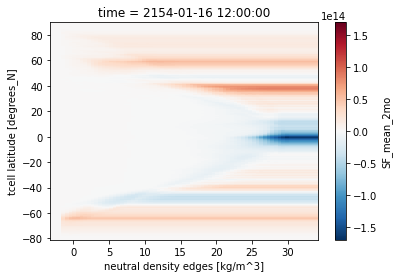

In [50]:
SF_2mo = xr.open_dataarray('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_SF_mean_2mo.nc')
SF_2mo.plot()

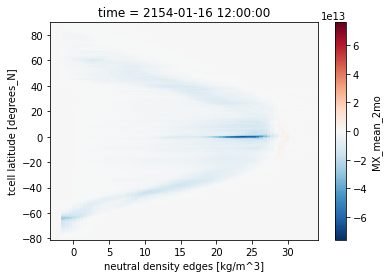

In [52]:
MX_2mo = xr.open_dataarray('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_MX_mean_2mo.nc')
MX_2mo.plot()

In [49]:
SF = xr.open_dataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/True_1year_means.nc').SF
Psi = xr.open_dataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/True_1year_means.nc').Psi
MX = xr.open_dataset('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/True_1year_means.nc').MX


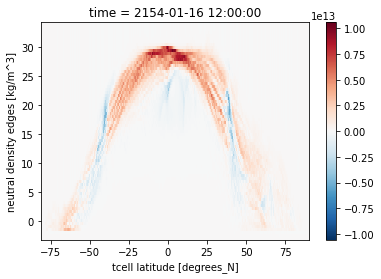

In [51]:
(SF.sum('grid_xt_ocean')/dy-SF_2mo).plot()

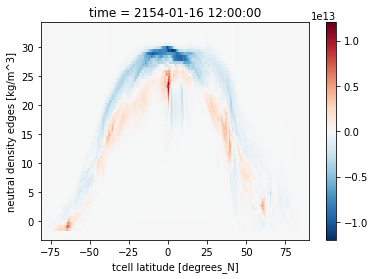

2022-06-15 00:29:36,483 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:36,574 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2022-06-15 00:29:36,615 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:36,638 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:36,733 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:36,902 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:36,983 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2022-06-15 00:29:37,008 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:37,011 - distributed.nanny - WARNING - Restarting worker
2022-06-15 00:29:37,174 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2022-06-15 00:29:37,180 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2022-06-15 00:29:37,200 - distributed.nann

In [53]:
(MX.sum('grid_xt_ocean')/dy-MX_2mo).plot()

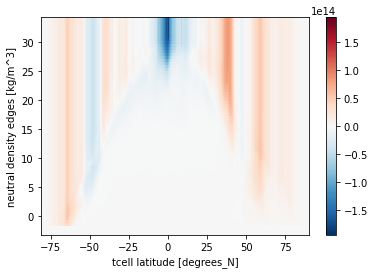

In [32]:
(SF.sum('grid_xt_ocean')/dy).plot()

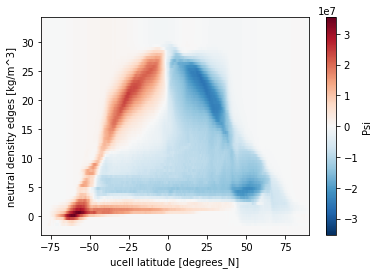

In [34]:
(Psi.sum('grid_xt_ocean')).plot()

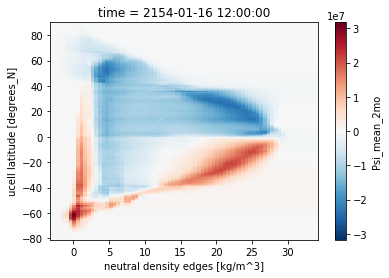

In [29]:
Psi_2mo = xr.open_dataarray('/scratch/e14/cy8964/temp/01deg_ryf_1012-1015/2mo_mean_1year_means_Psi_mean_2mo.nc')
(Psi_2mo).plot()

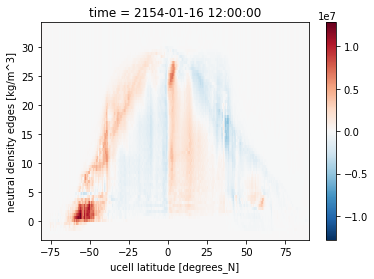

In [33]:
(Psi.sum('grid_xt_ocean')-Psi_2mo).plot()